#TB2: Quién es ese pokémon?

##Integrantes:

* Alessandro Carhuancho Bazán
* Andreluis Ingaroca Torres
* Sebastián Arana del Carpio

### Indicaciones

1) Elegir la ruta para el dataset en la primera celda de "Lectura de Datos"

2) Se comentó el "Entrenamiento", ya que se tiene los pesos guardados

3) En la sección de "Prueba con imagen de web", se puede utilizar los siguientes ejemplos:

 * Mewto Link:

https://www.gbposters.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/m/p/mp2176-pokemon-mewtwo-glow.jpg

* Charizar Link:

https://i.pinimg.com/564x/ae/f4/f1/aef4f1a211a57e424dec3e46c6a05d46.jpg

* Pikachu Link

https://pbs.twimg.com/profile_images/378800000842511069/a3f4d226ec9174245e7975b38171c8dc_400x400.jpeg

* Abra Link

https://static.wikia.nocookie.net/espokemon/images/5/5f/Abra_en_la_primera_generaci%C3%B3n.png/revision/latest?cb=20110302205035

###Vinculación con Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Librerías

In [2]:
import os
import random as rn
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from ipywidgets import Button, HBox

In [3]:
%matplotlib inline

# __Lectura de Datos__
##Aqui reemplace la ruta donde esta ubicado la carpeta dataset

In [4]:
dataset_path = '/content/drive/MyDrive/' + 'dataset/'

### Se lee cada una de las imágenes de los 10 directorios de Pokemones del data set

###Se aplica un reescalado para convertir la imagen a 80x80 píxeles

###Se convierte a escala de grises para no tener 3 capas de color

In [ ]:
DATADIR = dataset_path
CATEGORIES = ["Abra", "Articuno","Charizard",
              "Eevee", "Bulbasaur", "Pikachu",
              "Caterpie", "Squirtle", "Gyarados","Mewtwo"]
hg = 80
def datos():
  stack = []
  for cat in CATEGORIES:
    #ruta por categoria
    path = os.path.join(DATADIR, cat)
    #index de la etiqueta
    label = CATEGORIES.index(cat)
    print(label)
    #nombre de las fotos
    listdir = os.listdir(path)
    #Leer imagenes
    for i in range(len(listdir)):
      image_name = listdir[i]
      img_path = os.path.join(path,image_name)
      try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (hg,hg))
      except Exception as e:
        pass
      stack.append([img, label])

  return stack  


### Se aplica un shuffle para distribuir aleatoriamente

### Se convierte a numpy y dividimos en 255 para trabajar con valores de tipo Float en un intervalo de [0,1] 

In [ ]:
stack = datos()
#Hacemos un random a los valores de stack
rn.shuffle(stack)
x, y = [],[]
#numero de fotos
n = len(stack)
for i in range(n):
  x.append(stack[i][0])
  y.append(stack[i][1])
x = np.array(x).reshape(-1, hg, hg,1)
x = x/255.0
y = np.array(y)
print("Lectura de datos exitosa!!")

0
1
2
3
4
5
6
7
8
9
Lectura de datos exitosa!!


### Se muestra la cantidad de imágenes por Pokémon

[]

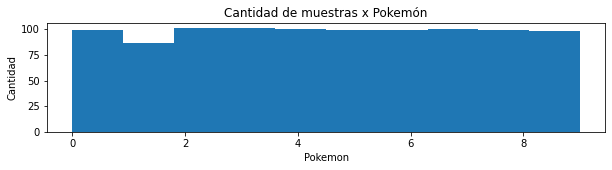

In [ ]:
plt.figure(figsize=(10, 2))
plt.title("Cantidad de muestras x Pokemón")
plt.ylabel("Cantidad")
plt.xlabel("Pokemon")
plt.hist(y, bins=10)
plt.plot()

###Separar fotos de entrenamiento y testeo

####Las imágenes de entrenamiento son el 80% del dataset y las imágenes del testeo son del 20%, se logra utlizando "test_size"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)

###Modelo de Red Neuronal Convolucional

####Configuración del modelo

In [ ]:
lr = 0.0005
bs = 16
model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(hg,hg,1), padding='same'),
                    MaxPool2D(),
                    
                    Conv2D(64, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(10, activation='softmax')]) #no modificar
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)            


#ENTRENAMIENTO

In [ ]:
log = model.fit(X_train,y_train, epochs = 5, batch_size=bs, verbose=0, validation_data=(X_test, y_test))

###Guardado de los pesos del modelo entrenado

In [ ]:
model.save_weights(dataset_path + 'save_model/')

#USO DEL MODELO ENTRENADO

### Cargar modelo

In [ ]:
model.load_weights(dataset_path + 'save_model/')

###Resultados de la Red Neuronal

In [ ]:
loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
print(f'Loss     = {loss:.4f}')
print(f'Accuracy = {acc:.4f}')

Loss     = 1.7124
Accuracy = 0.6041


###Prueba con imagen de Test

Elegimos una imagen aleatoria del dataset de Testeo

(80, 80, 1)


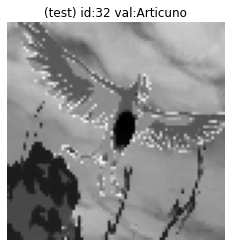

[0.10113628 0.12514104 0.38893926 0.075235   0.02449967 0.01472243
 0.02044412 0.12156419 0.09119313 0.03712493]


In [ ]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
print(im.shape)
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, CATEGORIES[label]))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()
salida = model.predict(im[None,:,:,:])[0]
print(salida)

###Muestra de la predicción 

<BarContainer object of 10 artists>

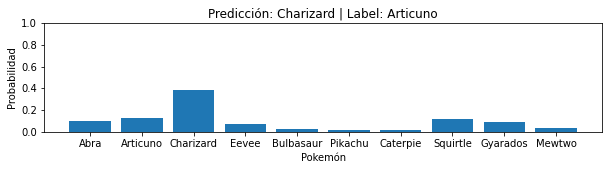

In [ ]:
plt.figure(figsize=(10, 2))
plt.title("Predicción: {} | Label: {}".format(CATEGORIES[salida.argmax()], CATEGORIES[label]))
plt.ylabel("Probabilidad")
plt.xlabel("Pokemón")
plt.ylim([0,1])
plt.bar(CATEGORIES, salida)

###Prueba con imagen de web

####Se puede probar con una imagen de la web, colocando el link de la imagen a predecir


https://i.pinimg.com/564x/ae/f4/f1/aef4f1a211a57e424dec3e46c6a05d46.jpg


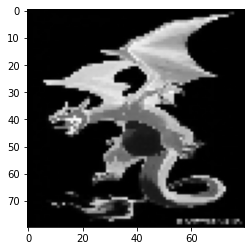

[5.2257394e-07 9.2503503e-03 9.5242035e-01 4.4835964e-03 3.0864596e-06
 1.9340061e-06 8.0094738e-05 1.5203203e-02 1.7766416e-02 7.9051167e-04]


In [ ]:
link = input()
temp_path = dataset_path + 'temp/temp.jpg'

real_image = imread(link)
cv2.imwrite(temp_path, real_image)

real_image = cv2.imread(temp_path, cv2.IMREAD_GRAYSCALE)
x = cv2.resize(real_image, (hg,hg))

p = []
p.append(x)
p = np.array(p).reshape(-1, hg, hg,1)
p = p/255.0
#Seleccionamos la imagen y la mostramos
mn = p[0]
plt.imshow(-mn[:,:,0], cmap='gray')
plt.show()

salida2 = model.predict(mn[None,:,:,:])[0]
print(salida2)

###Predicción del pokémon en base al link puesto anteriormente

<BarContainer object of 10 artists>

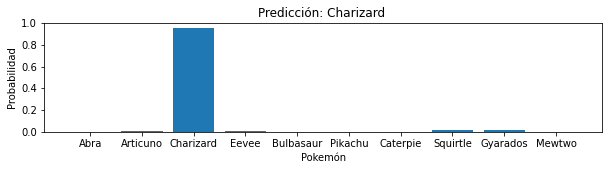

In [ ]:
plt.figure(figsize=(10,2))
plt.title("Predicción: {} ".format(CATEGORIES[salida2.argmax()], CATEGORIES[label]))
plt.ylabel("Probabilidad")
plt.xlabel("Pokemón")
plt.ylim([0,1])
plt.bar(CATEGORIES, salida2)

###Función para añadir una nueva imagen al dataset

In [ ]:
def saveInDataSet():
  number = rn.uniform(1,10000000)
  save_path = DATADIR + CATEGORIES[salida2.argmax()] + '/' + str(number) +'.jpg'
  cv2.imwrite(save_path, real_image)
  print("Gracias por contribuir al crecimiento de nuestro data set :D")
  print("La imagen se guardó en: ", save_path)

## ¿La predicción fue correcta?

In [ ]:
thisandthat = ['SI', 'NO']

switch = [Button(description=name) for name in thisandthat]

combined = HBox([items for items in switch])

def upon_clicked(btn):
    print(f'The circuit is {btn.description}.', end='\x1b\r')
    for n in range(len(thisandthat)):
        switch[n].style.button_color = 'gray'
    btn.style.button_color = 'pink'
    if (btn.description=='SI'):
      saveInDataSet()
    else:
      print('La predicción fue erronea, pruebe con otra imagen.')


for n in range(len(thisandthat)):
    switch[n].on_click(upon_clicked)

display(combined)